# Exercises 03: exploring some data

Here again we will use the AWS data at Zhadang, on OLAT:

data_Zhadang_localtime.csv
    
The purpose of this excercise is to explore the AWS data and to familiarize you with some... problems that "real world data" can have.

If you are not experienced with data anaylsis in python the first two notebooks were designed to give you the tools required to perform the analysis required in this notebook, so check them out for inspiration (i.e. examples to copy!)

The report by Maussion et al., 2011, that is in the reading folder on the OLAT page gives you information about the Zhadang glacier and weather station.

In [1]:
# here we can start with the usual imports and defaults, plus your preferences if you have some ...
import pandas as pd  
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 14


import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

Read the data with pandas and explore the dataframe. 

Make some notes about the annual cycle, range, and units of each variable to describe the general setting of meteorological conditions at Zhadang glacier. Is it what you expected?

Also take a look at the code and check you understand from the examples in exercise 2 what the commands are doing - you can search commands online for a description https://matplotlib.org/tutorials/introductory/pyplot.html or ask for help.

In [2]:
# read the data ... remember this?
df = pd.read_csv('data_Zhadang_localtime.csv', index_col=0, parse_dates=True)

In [3]:
# how are you going to 'explore' this data?

# here is one way to plot all the variables and output them as .png files:
for c in df.columns:
    # empty figure and plot
    plt.figure(figsize=(6, 4))
    df[c].plot(title=c)
    plt.tight_layout()
    plt.savefig(c + '.png', dpi=300)
    plt.close()    

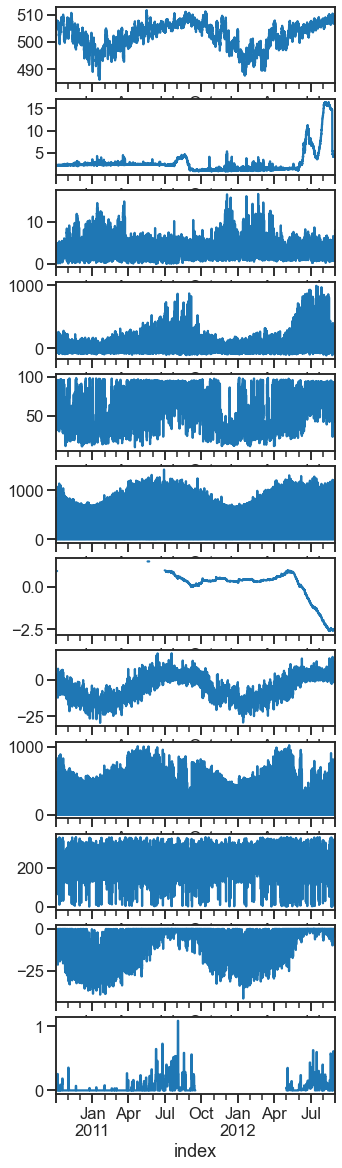

In [4]:
# here is an alternative multiplot format
plt.figure(figsize= (5,20))
VAR = df.columns
for v, var in enumerate(VAR, 1):
        plt.subplot(len(VAR), 1, v)
        df[var].plot()

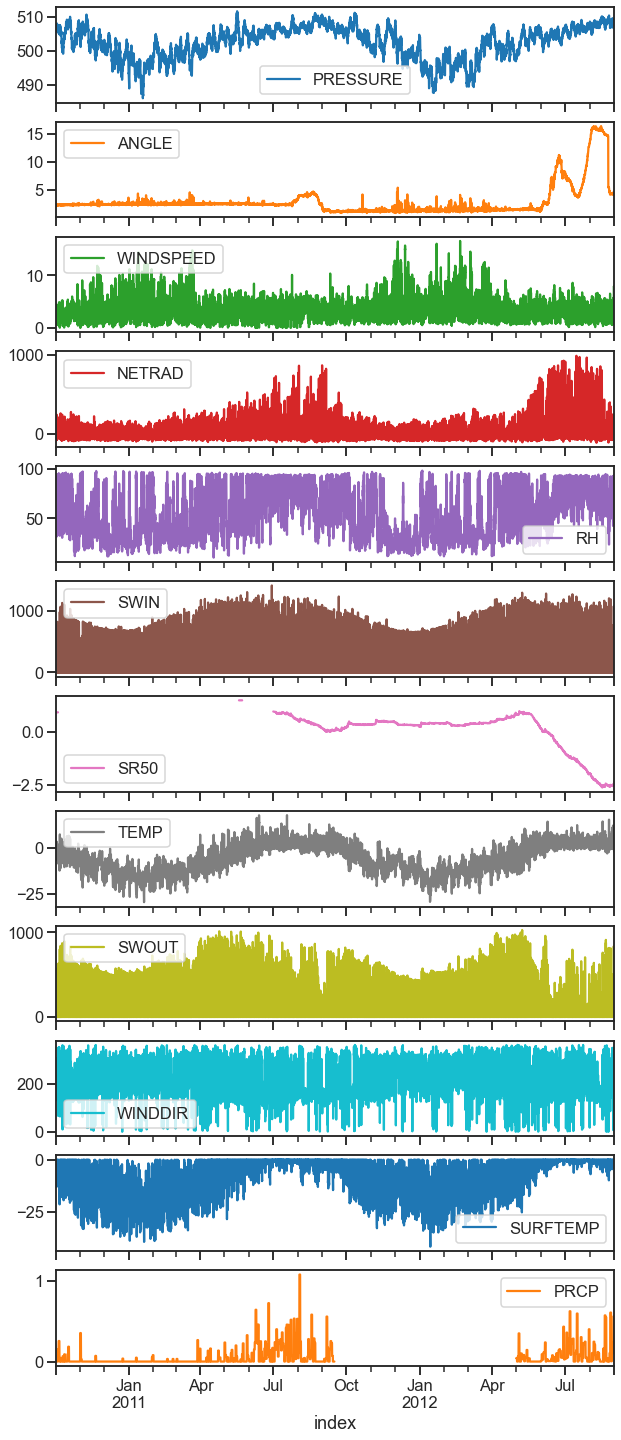

In [5]:
# or you can also use pandas subplots option
df.plot(subplots=True, figsize=(10,25));

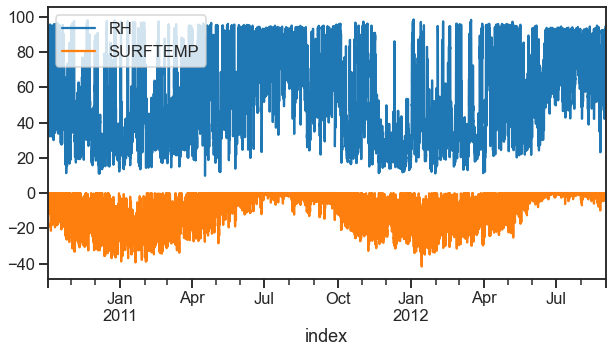

In [6]:
# you can also use the power of the pandas plot method to plot more variables into the same axis
df.plot(y=['RH', 'SURFTEMP'], figsize=(10,5));

### Exercise 1: shortwave radiation

**Plot hourly SWIN and SWOUT on the same plot for the entire data period. Discuss the features of the plot (periodicity, maxima, minima...). Can you determine at first sight which season is cloudier than others? Or when approximately we have a snow cover, and ice cover?**

<AxesSubplot:xlabel='index'>

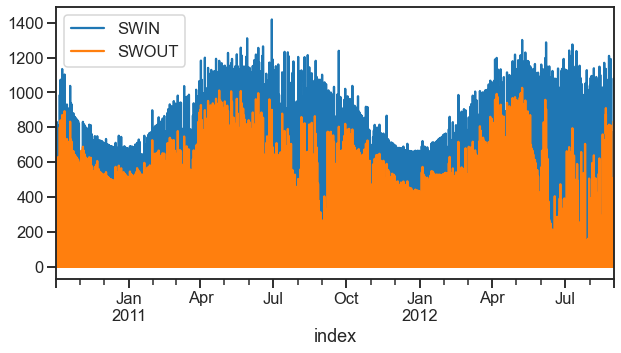

In [7]:
# read the data

df.plot(y=['SWIN', 'SWOUT'], figsize=(10,5))


**Make a scatterplot of SWIN versus SWOUT. What features can you describe?**

(Tip: you can use 'x' and 'y' paramtere of pandas plot method together with 'kind')

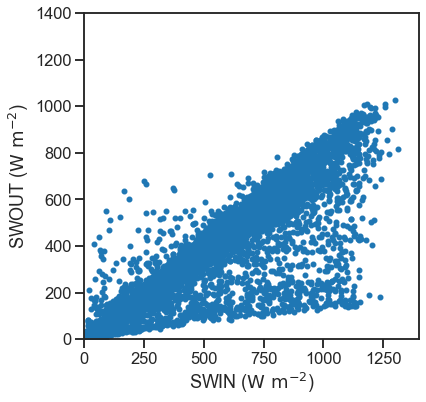

In [8]:
ax = df.plot(kind='scatter',
             x='SWIN',
             y='SWOUT',
             figsize=(6,6))
ax.set_xlabel('SWIN ($\mathrm{W~m^{-2}}$)');
ax.set_ylabel('SWOUT ($\mathrm{W~m^{-2}}$)');
ax.set_xlim([0, 1400]);
ax.set_ylim([0, 1400]);


Christmas Eve was a nice, cold and sunny day at Zhadang. 

**Make a new dataframe (dfchris) which is a subset of the data for the Christmas Eve of 2011. Plot SWIN and SWOUT on the same plot.**

**Compute the hourly albedo for this same Christmas day and add it to the dfchris dataframe.** 

Dividing by zero is never a good idea, the invalid values will be replaced with nan (not a number).

**Plot the albedo over the course of this day and discuss. What could be the reasons for this?**

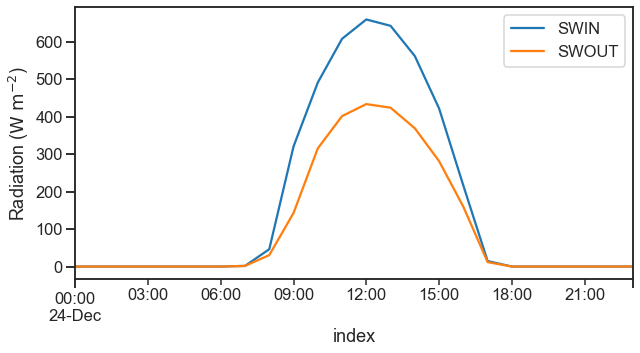

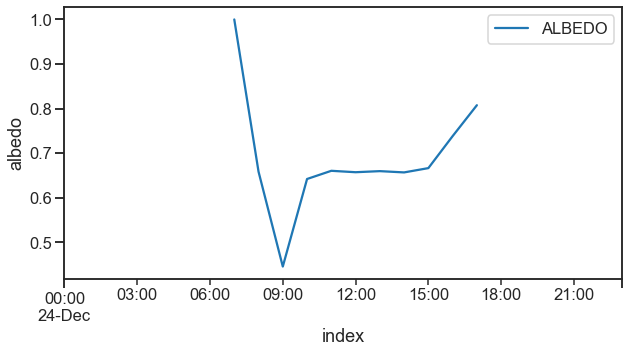

In [25]:
dfchris = df.loc['2011-12-24'].copy()
dfchris.plot(y=['SWIN','SWOUT'], 
            ylabel='Radiation ($\mathrm{W~m^{-2}}$)',
            figsize=(10,5));

dfchris['ALBEDO'] = dfchris['SWOUT'] / dfchris['SWIN']
dfchris.plot(y='ALBEDO',
            ylabel='albedo', 
            figsize=(10,5));

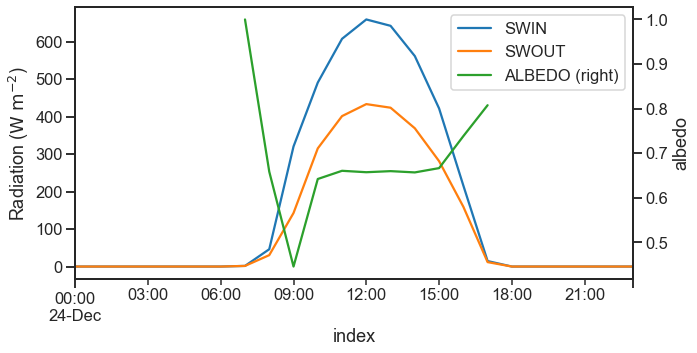

In [10]:
# or all in one plot
dfchris.plot(y=['SWIN', 'SWOUT'],
             ylabel='Radiation ($\mathrm{W~m^{-2}}$)',
             figsize=(10,5))

ax = dfchris['ALBEDO'].plot(secondary_y=True,
                            legend=True)
ax.set_ylabel('albedo');

**We leave Chrismas and have a look at the 25th of April, 2012. Again, plot SWIN and SWOUT on that day. Discuss. Plot the meterological conditions during the 5-day period centered on 2012-04-25. Can it explain what you see?**

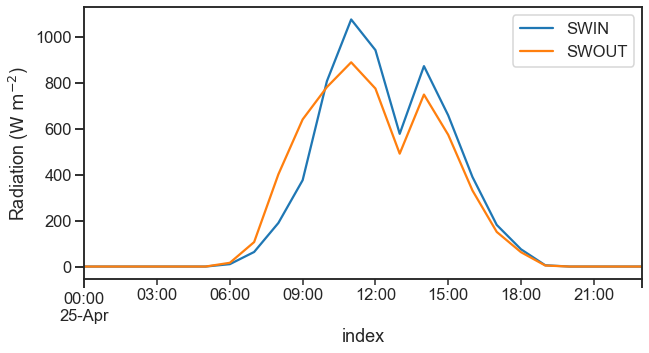

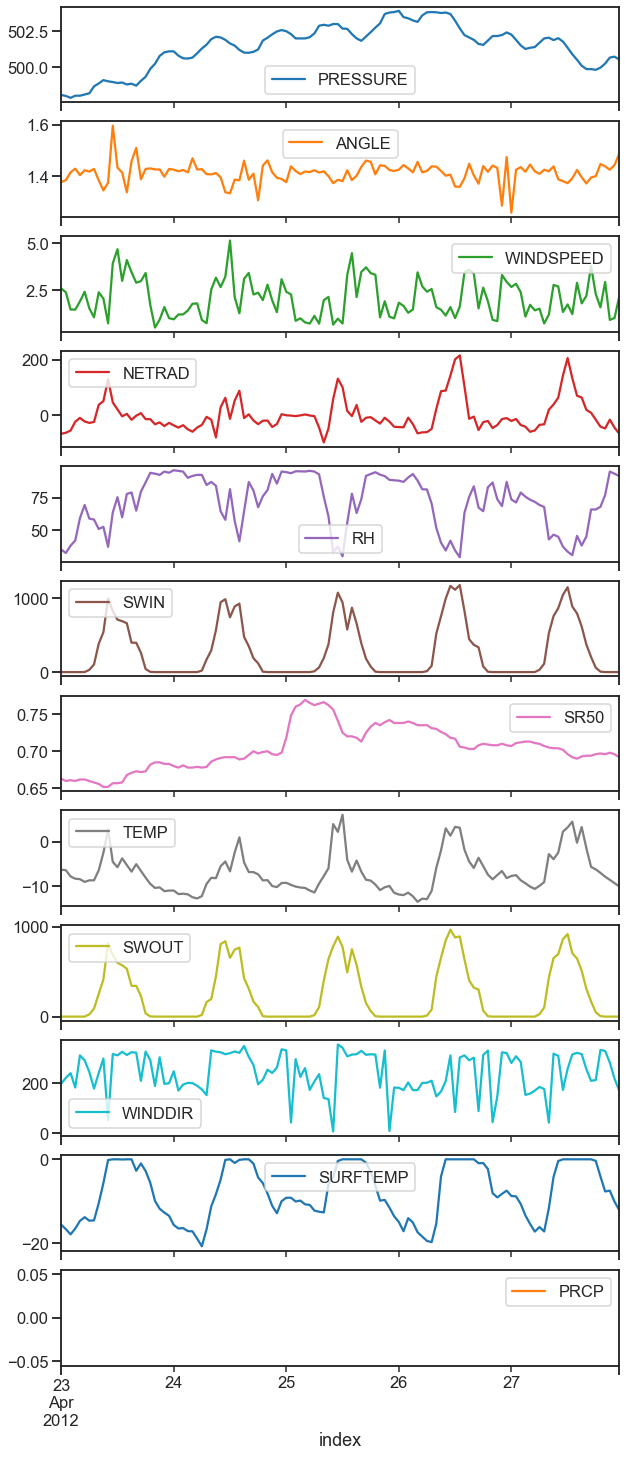

In [11]:
# some data exploration

apr25 =df.loc['2012-04-25']
apr25.plot(y=['SWIN', 'SWOUT'],
           ylabel='Radiation ($\mathrm{W~m^{-2}}$)',
           figsize=(10,5));

fapr = df.loc['2012-04-23':'2012-04-27']
fapr.plot(subplots=True, figsize=(10,25));

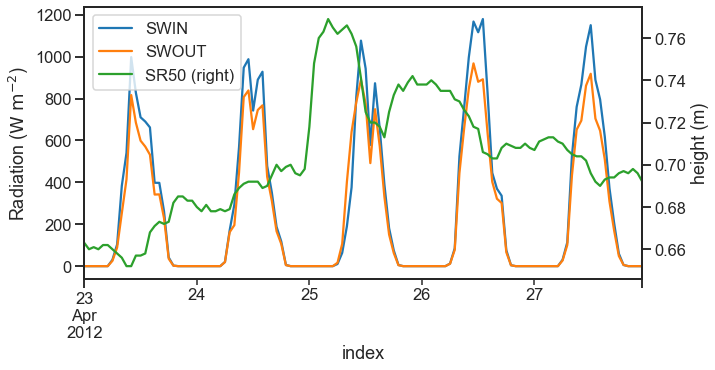

In [12]:
fapr.plot(y=['SWIN', 'SWOUT'],
          ylabel='Radiation ($\mathrm{W~m^{-2}}$)',
          figsize=(10,5))

ax = fapr['SR50'].plot(secondary_y=True,
                       legend=True)
ax.set_ylabel('height (m)');

Because of these problems described above, scientists are using a more robust method to compute the albedo: the "daily albedo", much less sensitive to measurement errors and other issues. It is NOT defined as the average of the hourly albedo, but as the ratio of daily amount (sums) of reflected radiation to global radiation. 

**Make a new dataframe containing the daily albedo (at a daily time step then). Plot it. Any issue? Filter it out, or change the range of the plot axis. Discuss.**

(Tip: for filtering you can use pandas .where() method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html)

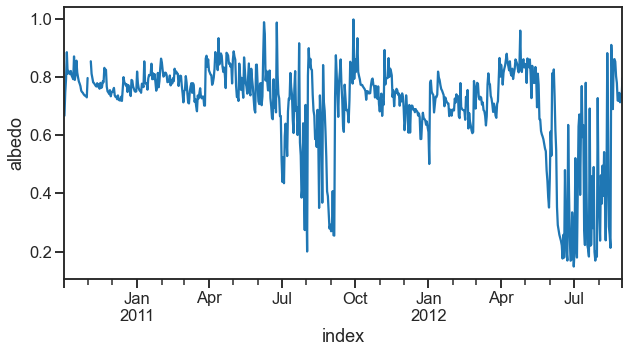

In [13]:
daily_sum = df.resample('D').sum()
daily_albedo = daily_sum['SWOUT'] / daily_sum['SWIN']
daily_albedo = daily_albedo.where((daily_albedo >= 0.) & (daily_albedo <= 1.))
daily_albedo.plot(ylabel='albedo',
                  figsize=(10,5));

### Exercise 2: longwave radiation

The net-radiation sensor mounted on the AWS at Zhadang is an [NRLITE](http://www.kippzonen.com/Product/31/NR-Lite2-Net-Radiometer#.Vx_mwCaLiBs). It measures the net radiation in visible and infra-red wavelenghts together, which makes it less interpretable. During the night, however, it is guaranteed to measure the longwave budget only.

**Make a new dataframe (DFN) which contains data for the night time only. Plot the net radiation, first as a time series and then as an histogram with a large number of bins (e.g. 100). Discuss. Could you distinguish between cloudy and clear-sky conditions? Which other variable could help you out to find out? Could you come up with an algorithm able to select cloudy nights from clear-sky nights?**

(Tip: with pandas plot method you can directly use the parameter 'bins' if 'kinds=hist')

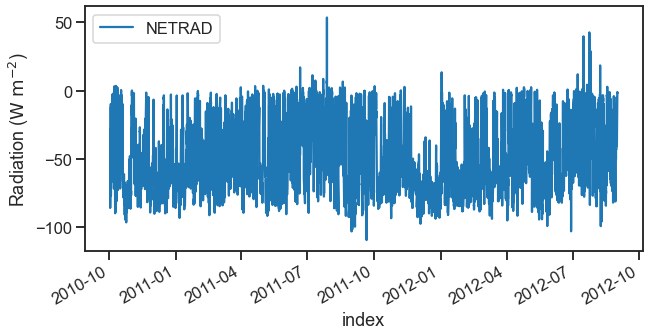

In [14]:
dfn = df.loc[df.SWOUT == 0]
dfn.plot(y='NETRAD',
         ylabel='Radiation ($\mathrm{W~m^{-2}}$)',
         figsize=(10,5));

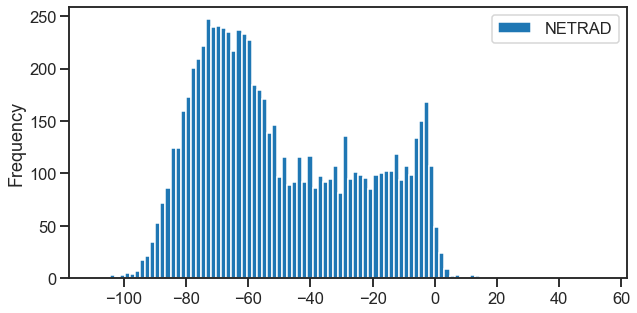

In [15]:
dfn.plot(kind='hist',
         y='NETRAD', 
         bins=100, 
         figsize=(10,5));

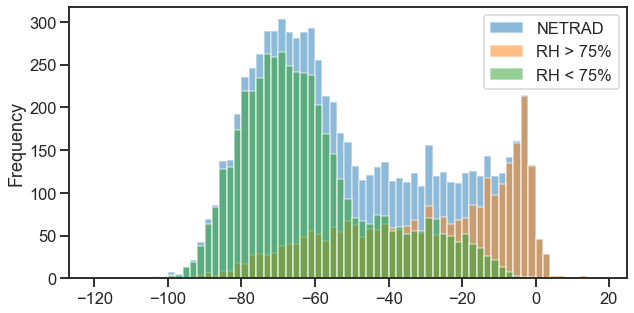

In [16]:
bins = np.arange(70) * 2 - 120
dfn.NETRAD.plot(kind='hist',
                bins=bins,
                alpha=0.5,
                figsize=(10,5));
dfn.loc[df.RH > 75].NETRAD.plot(kind='hist',
                                bins=bins,
                                label='RH > 75%',
                                alpha=0.5,
                                figsize=(10,5));
dfn.loc[df.RH <= 75].NETRAD.plot(kind='hist',
                                 bins=bins,
                                 label='RH < 75%',
                                 alpha=0.5,
                                 figsize=(10,5));
plt.legend();

### Exercise 3: wind

The wind direction is given with an angle value, which reports the direction from where the wind is blowing:

North: 0°
South: 180°
West: 270°
East: 90°

For example, if the wind direction is 45 degrees, the winds are coming out of the northeast and blowing towards the southwest. This would be called a north-easterly wind.

Discuss the possible implications that a naive averaging of the wind direction would have. Does it actually make sense to plot the wind direction as a line? Plot the wind-direction as an histogram. Choose the number of bins so that the size of a bin is 10°.

By entering the coordinates of the station (30.47153N, 90.64534E) in http://www.bing.com/maps/ you can have a look at the geographical situation of the glacier. Analyse the dominant wind directions in this context. From which directions does the wind almost never blow?

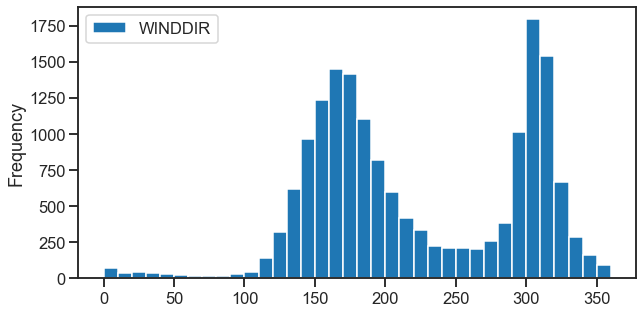

In [17]:
# histogram plot
df.plot(y='WINDDIR',
        kind='hist',
        bins=36,
        figsize=(10,5));

**Out of the data, compute the probability that the measured wind-speed over an hour is zero. Plot one of these events where wind-speed is equal to zero for a few hours. Discuss.**

In [18]:
zero_wind_hour = df.loc[df['WINDSPEED'] == 0]
probability_zero_wind_hour = len(zero_wind_hour) / len(df) * 100
print('The probability for wind-speed of zero in an hour is {:.2f}%\n'.format(probability_zero_wind_hour))

# print the timeindex to find a period where the wind is zero
print(zero_wind_hour.index)

The probability for wind-speed of zero in an hour is 0.26%

DatetimeIndex(['2010-11-01 07:00:00', '2011-04-13 07:00:00',
               '2011-06-09 00:00:00', '2011-06-09 01:00:00',
               '2011-06-09 02:00:00', '2011-06-09 03:00:00',
               '2011-06-09 04:00:00', '2011-06-09 05:00:00',
               '2011-06-09 06:00:00', '2011-06-09 07:00:00',
               '2011-06-10 02:00:00', '2011-06-10 03:00:00',
               '2011-06-10 04:00:00', '2011-07-05 06:00:00',
               '2011-07-06 04:00:00', '2011-07-12 20:00:00',
               '2011-07-12 21:00:00', '2011-07-12 22:00:00',
               '2011-07-16 20:00:00', '2011-07-16 21:00:00',
               '2011-07-16 22:00:00', '2011-07-16 23:00:00',
               '2011-07-17 00:00:00', '2011-07-17 01:00:00',
               '2011-07-17 02:00:00', '2011-07-17 03:00:00',
               '2011-07-17 04:00:00', '2011-07-17 05:00:00',
               '2011-07-17 06:00:00', '2011-07-17 07:00:00',
               '2011-07-2

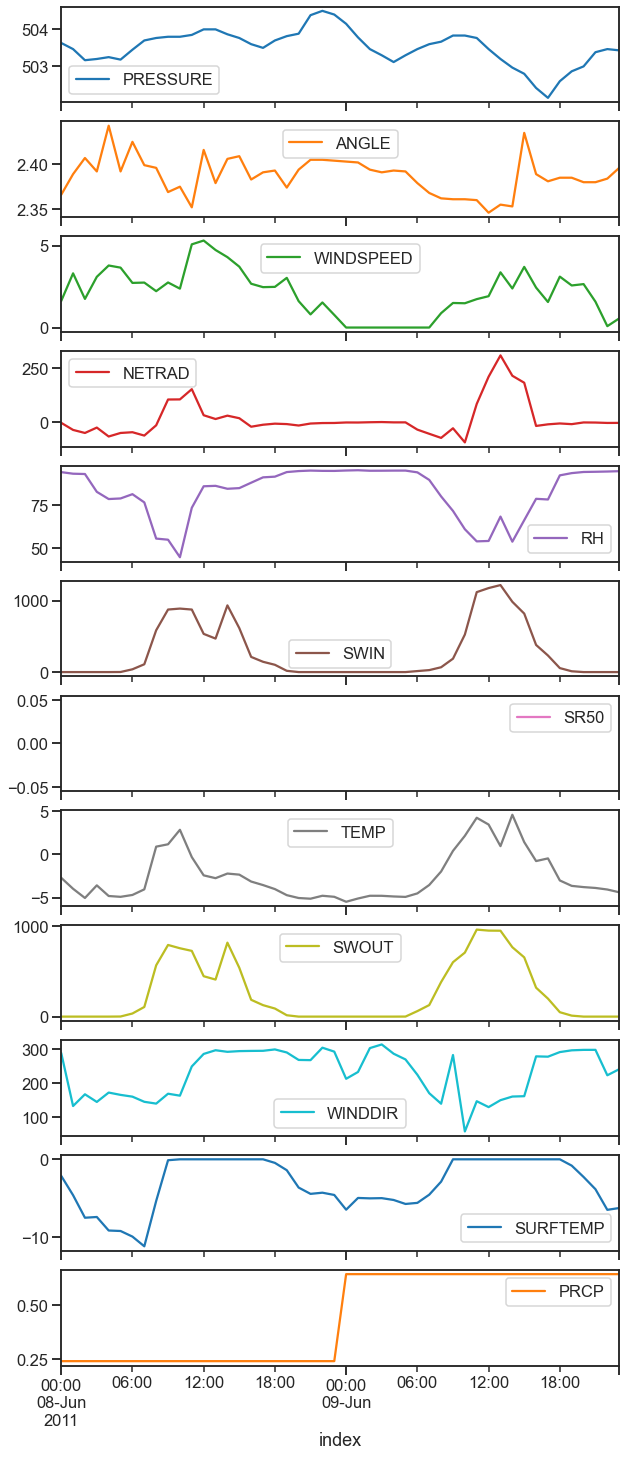

In [19]:
zero_wind_period = df.loc['2011-06-08':'2011-06-09']
zero_wind_period.plot(subplots=True,
                      figsize=(10,25));

### Exercise 4: positive air temperatures

One of the oldest (and still widely used) model of ice and snow melt is the degree day model. It relies on the assumption that melt occurs when air temperature is above the melting point.

**Compute the daily averages of air temperature and select the days with temperature above zero. When do they occur? Count the number of days with average temperature above zero. Discuss.**

In [20]:
# Averages
dailytemp = df['TEMP'].resample('D').mean()

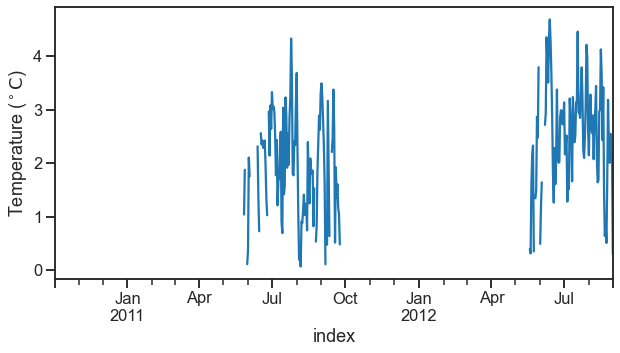

In [21]:
# For the plot its better to crop than select 
dailytemp.loc[dailytemp < 0] = np.NaN
dailytemp.plot(ylabel='Temperature ($\mathrm{^\circ C}$)',
               figsize=(10,5));

In [22]:
# count
ndays = len(dailytemp.loc[dailytemp > 0])
totdays = len(dailytemp)
print('{} days out of {} have a daily average above 0°C'.format(ndays, totdays))

208 days out of 700 have a daily average above 0°C


'1.2.4'